In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

from joblib import dump,load

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/oil_dataset.csv')
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Mendacium  1000 non-null   float64
 1   Depth      1000 non-null   float64
 2   Price      1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


,Mendacium,Depth,Price
0,3.359,1722.533,74.048691
1,1.348,2062.571,83.321907


In [6]:
X=df[['Mendacium','Depth']]
y=df['Price']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.2,random_state=1)

In [7]:
model=RandomForestRegressor()
model.fit(xtrain,ytrain)


RandomForestRegressor()

In [8]:
print("score:",model.score(xtest,ytest)*100)
pred=model.predict(X)
print("mse:",mean_squared_error(y,pred))
print("mae:",mean_absolute_error(y,pred))

score: 95.44702744613164
mse: 14.515676073441888
mae: 2.7849544792804


<AxesSubplot:ylabel='Density'>

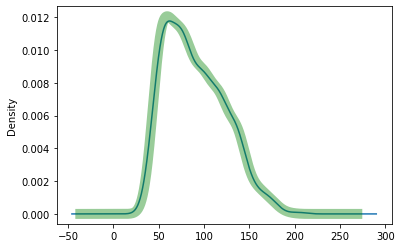

In [9]:
df['p1']=pred
ax=df['Price'].plot(kind='kde')
df['p1'].plot(kind='kde',ax=ax,alpha=.4,color='green',linewidth=10)

In [10]:
dump(model,"oil_pricing_random_forest.pkl")

['oil_pricing_random_forest.pkl']